In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv(r"C:\Users\21699\Downloads\titanic-passengers.csv",sep=';')
print(data.head())
data.info()
data.describe()


   PassengerId Survived  Pclass                                         Name  \
0          343       No       2                   Collander, Mr. Erik Gustaf   
1           76       No       3                      Moen, Mr. Sigurd Hansen   
2          641       No       3                       Jensen, Mr. Hans Peder   
3          568       No       3  Palsson, Mrs. Nils (Alma Cornelia Berglund)   
4          672       No       1                       Davidson, Mr. Thornton   

      Sex   Age  SibSp  Parch      Ticket     Fare  Cabin Embarked  
0    male  28.0      0      0      248740  13.0000    NaN        S  
1    male  25.0      0      0      348123   7.6500  F G73        S  
2    male  20.0      0      0      350050   7.8542    NaN        S  
3  female  29.0      0      4      349909  21.0750    NaN        S  
4    male  31.0      1      0  F.C. 12750  52.0000    B71        S  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
data['Age'].fillna(data['Age'].mean(),inplace=True)


In [10]:
data.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
data1=data.dropna(axis=1,thresh=205,inplace=False)


In [14]:
data1.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [15]:
print(data1['Embarked'].value_counts())
data1['Embarked'].fillna('S',inplace=True)
data1.isnull().sum()

S    644
C    168
Q     77
Name: Embarked, dtype: int64


C:\Users\21699\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [16]:
print(data1['Survived'].value_counts())


No     549
Yes    342
Name: Survived, dtype: int64


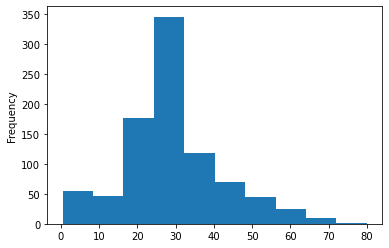

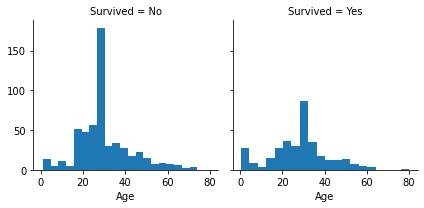

In [18]:
data1['Age'].plot.hist()
plot0= sns.FacetGrid(data1, col='Survived')
plot0.map(plt.hist,'Age',bins=20)

male      577
female    314
Name: Sex, dtype: int64


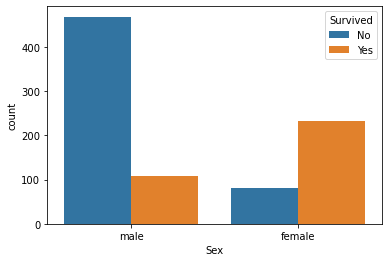

In [19]:
bysex=data1['Sex'].value_counts()
print(bysex)
sns.countplot(x="Sex", hue="Survived", data=data1)

In [25]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data1['Survived']=encoder.fit_transform(data1['Survived'])
print( data1[["Sex","Survived"]].groupby(["Sex"], as_index = False).mean() )

      Sex  Survived
0  female  0.742038
1    male  0.188908


C:\Users\21699\anaconda3\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


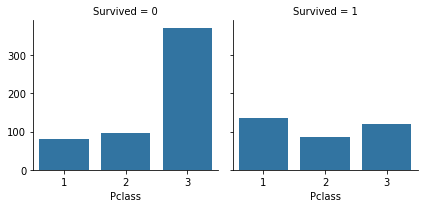

In [26]:
plot2= sns.FacetGrid(data1, col='Survived')
plot2.map(sns.countplot,'Pclass')

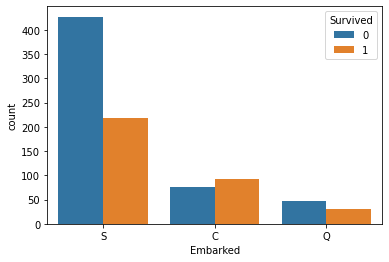

In [27]:
sns.countplot(x="Embarked", hue="Survived", data=data1)

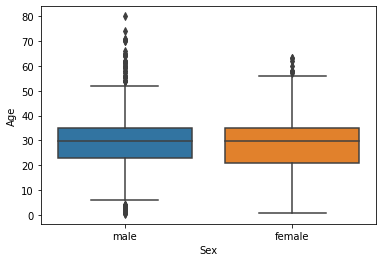

In [28]:
sns.boxplot(x='Sex', y='Age', data=data1)

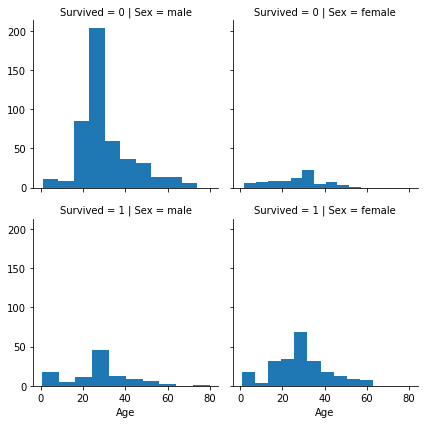

In [29]:
plot4=sns.FacetGrid(data1,row='Survived', col='Sex')
plot4.map(plt.hist, 'Age')

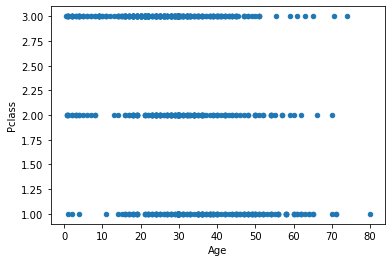

In [30]:
data1.plot.scatter(x='Age',y='Pclass')

In [31]:
sex_map= {
 'male': 0,
 'female': 1}
data1['Sex'] = data1['Sex'].map(sex_map)

In [32]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

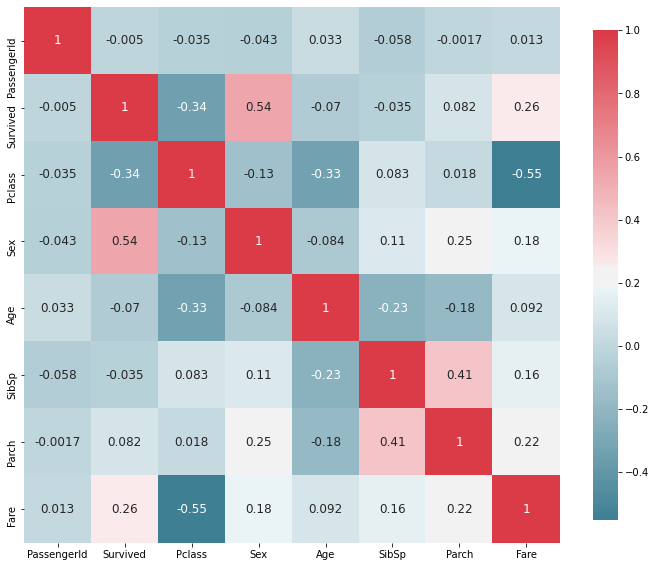

In [33]:
plot_correlation_map(data1)

In [34]:
print( data1[["Pclass","Survived"]].groupby(["Pclass"], as_index = False).mean() )

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


In [35]:
data1['Name'].head(10)

0                           Collander, Mr. Erik Gustaf
1                              Moen, Mr. Sigurd Hansen
2                               Jensen, Mr. Hans Peder
3          Palsson, Mrs. Nils (Alma Cornelia Berglund)
4                               Davidson, Mr. Thornton
5                       Gustafsson, Mr. Anders Vilhelm
6                                 Patchett, Mr. George
7                          Nakid, Miss. Maria ("Mary")
8                      Lovell, Mr. John Hall ("Henry")
9    Louch, Mrs. Charles Alexander (Alice Adelaide ...
Name: Name, dtype: object

In [36]:
import re
def get_title(name):
    title=re.findall(r'\b[A-Z][a-z]+\.',name)
    return title[0]

In [37]:
data1['Title'] = data1['Name'].apply(get_title)
data1['Title'].head()

0     Mr.
1     Mr.
2     Mr.
3    Mrs.
4     Mr.
Name: Title, dtype: object

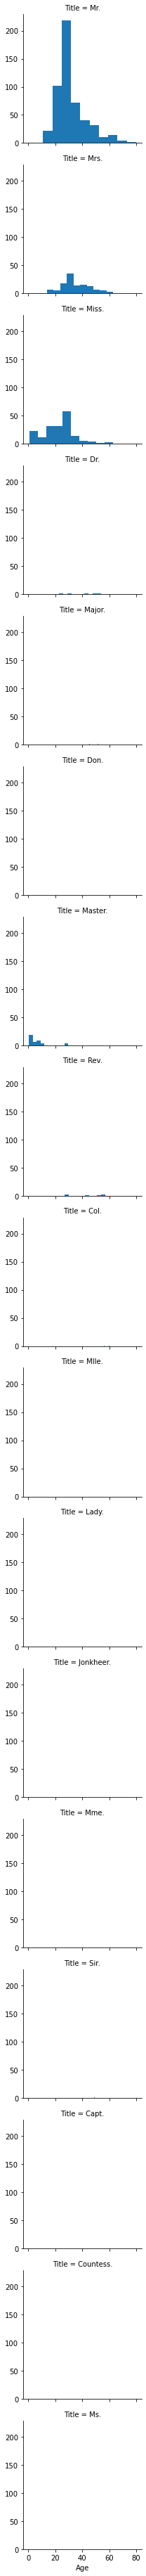

In [38]:
plot5=sns.FacetGrid(data1,row='Title')
plot5.map(plt.hist, 'Age')

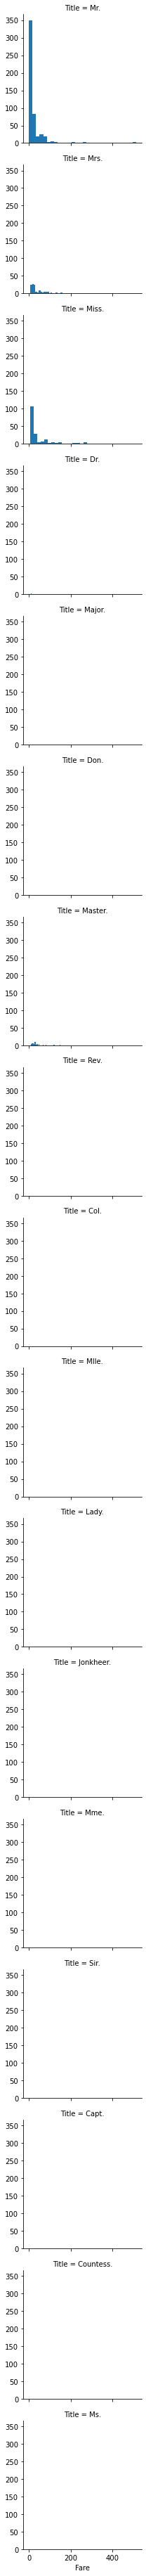

In [39]:
plot6=sns.FacetGrid(data1,row='Title')
plot6.map(plt.hist, 'Fare',bins=30)

In [40]:
Title_Dictionary = {"Capt.":       "Officer",

                    "Col.":        "Officer",

                    "Major.":      "Officer",

                    "Dr.":         "Officer",

                    "Rev.":        "Officer",

                    "Jonkheer.":   "Royalty",

                    "Don.":        "Royalty",

                    "Sir." :       "Royalty",

                   "Lady." :      "Royalty",

                  "Countess.": "Royalty",

                    "Dona.":       "Royalty",

                    "Mme.":        "Miss",

                    "Mlle.":       "Miss",

                    "Miss." :      "Miss",

                    "Ms.":         "Mrs",

                    "Mr." :        "Mrs",

                    "Mrs." :       "Mrs",

                    "Master." :    "Master"

                    }

In [41]:
data1['Title']=data1['Title'].map(Title_Dictionary)
data1['Title'].head()

0    Mrs
1    Mrs
2    Mrs
3    Mrs
4    Mrs
Name: Title, dtype: object

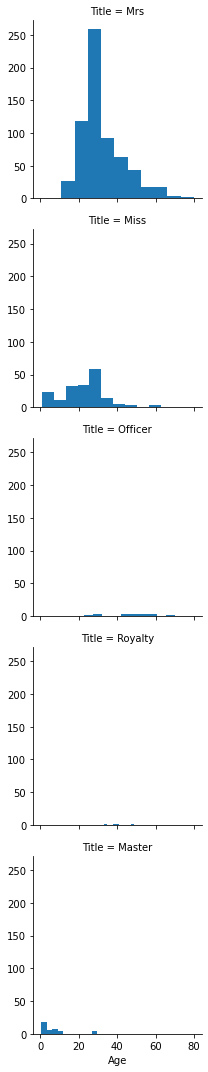

In [42]:
plot7=sns.FacetGrid(data1,row='Title')
plot7.map(plt.hist, 'Age')

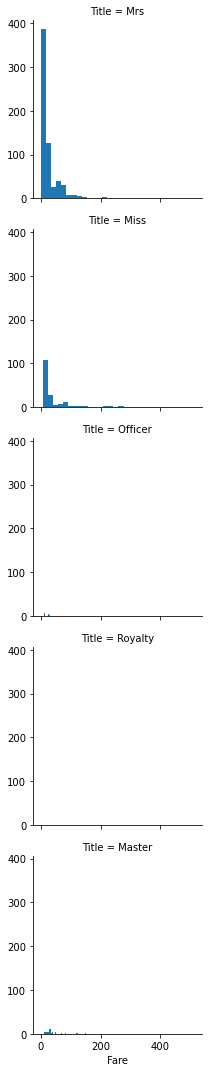

In [43]:
plot8=sns.FacetGrid(data1,row='Title')
plot8.map(plt.hist, 'Fare',bins=30)

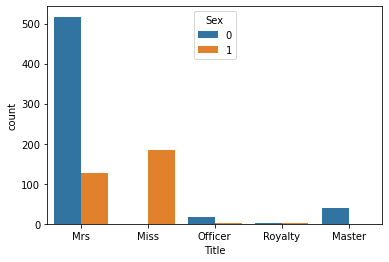

In [44]:
sns.countplot(x="Title", hue="Sex", data=data1)

In [45]:
data1['family_size'] = data1['SibSp'] + data1['Parch'] + 1
print( data1[["family_size","Survived"]].groupby(["family_size"], as_index = False).mean())

   family_size  Survived
0            1  0.303538
1            2  0.552795
2            3  0.578431
3            4  0.724138
4            5  0.200000
5            6  0.136364
6            7  0.333333
7            8  0.000000
8           11  0.000000


In [47]:
import os
os.path()

TypeError: 'module' object is not callable